<div class="alert alert-info">

### This is a Jupyter notebook

You can learn all about the Jupyter interface [here](https://realpython.com/jupyter-notebook-introduction/)

Some basics: 
Jupyter has two modes: command and edit. When you click a cell, you enter ```edit mode``` and you can edit its contents. To exit ```edit mode```, you press ```ESC```.

* Cells can be either code cells or text (or markdown) cells
* To run cells, press Shift+enter 
* To turn a cell into a text cell, press `m` (markdown) in command mode
* To create a new cell use `b` (new cell below) or `a` (above) in command mode

</div>

# Central Limit Theorem

In this notebook we delve into one of the main results in statistics: *the central limit theorem*.
The theorem is usually stated as:

*Let $\left\{X_0,...,X_n\right\}$ be a sample of size $n$ from a distribution with mean $\mu$ and standard deviation $\sigma$. Then, their **sum** will converge to a Normal distribution with mean $n\cdot\mu$ and standard deviation $\sqrt{n}\cdot\sigma$.*

$$
\sum_i X_i \sim N(n\cdot\mu,\sqrt{n}\cdot\sigma)
$$

Why is this important? It is particularly important because this allows us to **know** the distribution of the mean of sample. The mean of a sample is defined as:

$$
m = \frac{1}{n}\sum_i X_i
$$

The central limit tells us that this mean $m$ is distributed as a Normal with mean $\mu$ (the true mean of the distribution) and standard deviation $\frac{1}{sqrt{n}}\sigma$ (the standard error of the mean -- more on this later), regardless of where the data comes from!

In [1]:
options(repr.plot.width=8, repr.plot.height=4)

## How fast does it converge?

The first question that comes to mind is *how many data points are enough for the sum to be a normal?* The answer is *it depends*. In particular it depends on the distribution..

Let's explore this. 
First, we need to get some random numbers from some distributions. To sample from a normal, you can use `rnorm`. Other distributions include `rbinom` (Binomial), `rbeta` (Beta distribution), `rpois` (Poisson), `rexp` (Exponential), `rchisq` chi-square, etc... 

Second, we need to know how to check if something is normal.

In [6]:
#rbinom,rbeta,rchisq,rpois,rexp

x1 = rnorm(10) # this takes 10 random numbers
x2 = rnorm(100) # 100, etc
x3 = rnorm(1000)
x4 = rnorm(10000)

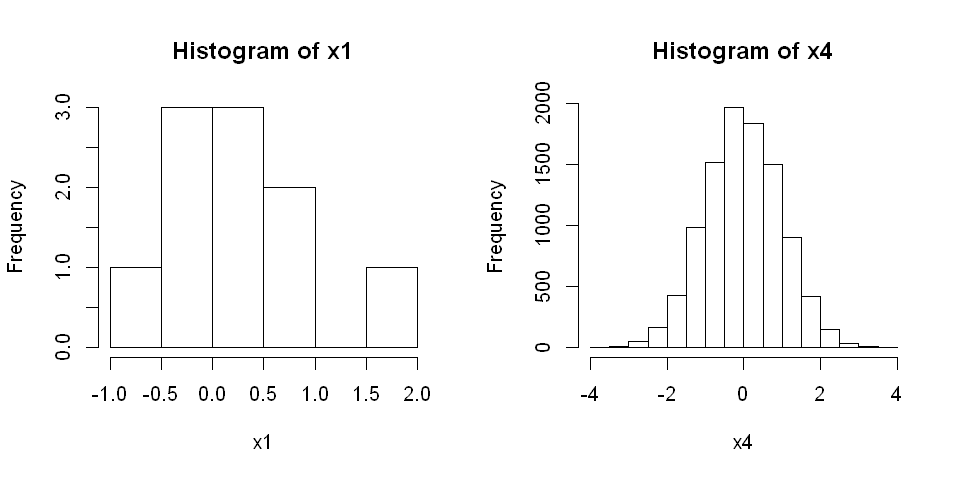

In [5]:
par(mfrow=c(1,2)) # this tells R that the next two plots are in a 1 by 2 grid
hist(x1)
hist(x4)

Plotting the histograms of the different samples helps to visually check if the sample is normal, but is not ideal. A better option is to use the cumulative distribution. The `ecdf` function calculates the CDF for data samples (the `e` stands for *empirical*).

Every distribution has 4 functions associated with it: `d`,`p`,`q` and `r`. You already know `rnorm`, which samples random numbers. `dnorm` returns the density function, `pnorm` returns the cumulative distribution and `qnorm` returns the quantile function. Replace the `norm` for other distributions.

``help(pnorm)``

In [15]:
help(qnorm)

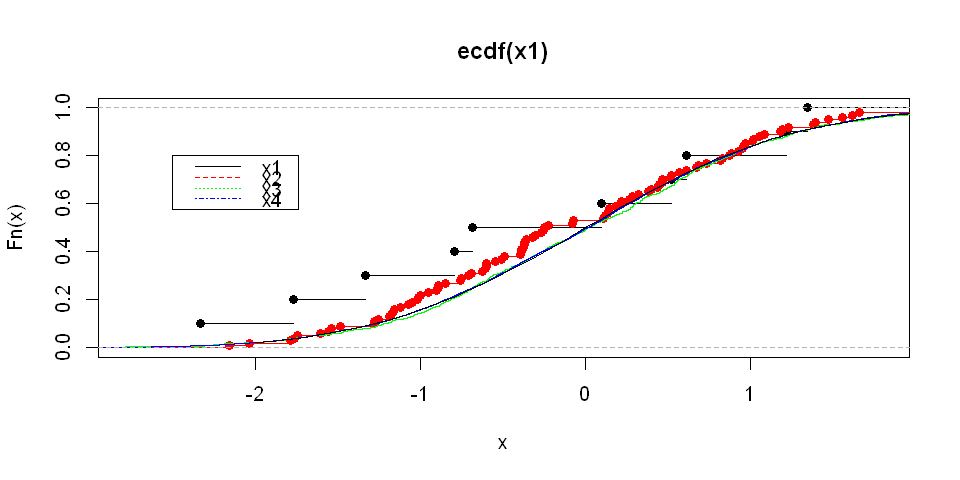

In [13]:

par(mfrow = c(1,1))

plot(ecdf(x1))
lines(ecdf(x2),col='red')
lines(ecdf(x3),col='green')
lines(ecdf(x4),col='blue')

xx= seq(-2,2,.1)
lines(xx,pnorm(xx))

legend(-2.5,.8,legend=c("x1","x2","x3","x4"),col=c("black","red","green", "blue"),lty=1:4)

Comparing cumulatives is a better way to visually check if something is normal. But better still is the quantile-quantile plot, which essentially plots the CDF of a sample and the distribution against each other. Something that looks normal will have a number of points below a particular value equal to the probability of a normal at that point.

**R** has functions for that:

* `qqnorm` will plot your sample against a normal,
* `qqplot` will plot your sample against some other sample (check visually that they look similar)

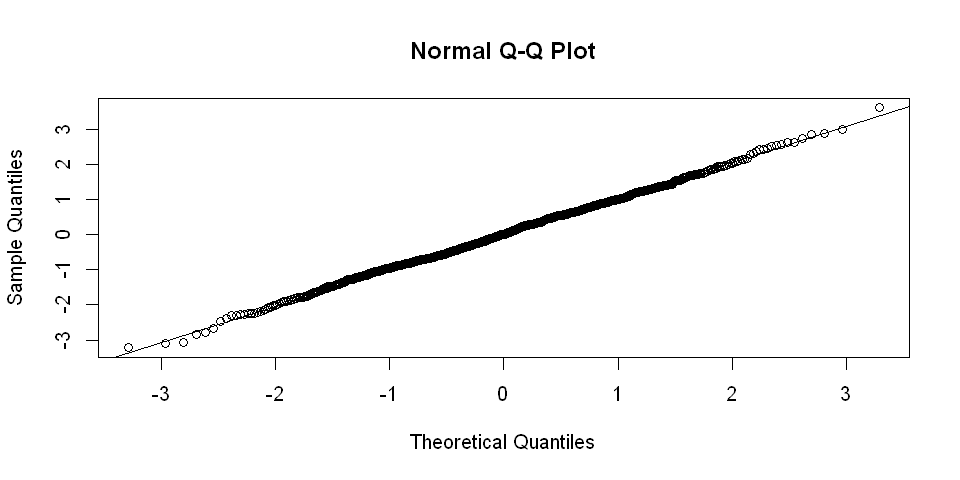

In [23]:
qqnorm(x3)
qqline(x3)

That looks Normal, as it should since we are sampling from normals. There are more formal ways to test for normality, but we will get to them later...

<div class="alert alert-warning">
Try it with some other distribution!
</div>

## Testing the central limit theorem

So now we can try to see the Central Limit Theorem in action. We are going to draw samples of different sizes from a distribution and see how well their sums approach a normal distribution.

### Exponential distribution

We first check the exponential distribution. We draw $100$ samples from an exponential distribution for different sample sizes. We calculate the mean to see how well it approximates the *real* mean (which is $1$ in this example). We can also calculate the standard deviation of each set of samples (for each sample size), to check how uncertain we are about our estimate of the mean. This is the **standard error of the mean**, which goes down with the sample size.

In [94]:
repetitions=100 # number of points per sample size
ns = c(2,5,10,20,50,100,200,500,1000) # sample sizes to evaluate

df = matrix(,0,4)

for (i in 1:length(ns)){

    for (j in 1:repetitions){
        x = rexp(ns[i])

        df = rbind(df,c(ns[i],sum(x),mean(x),sd(x)))
    }  
}

colnames(df) = c("n","sum","mean","sd")


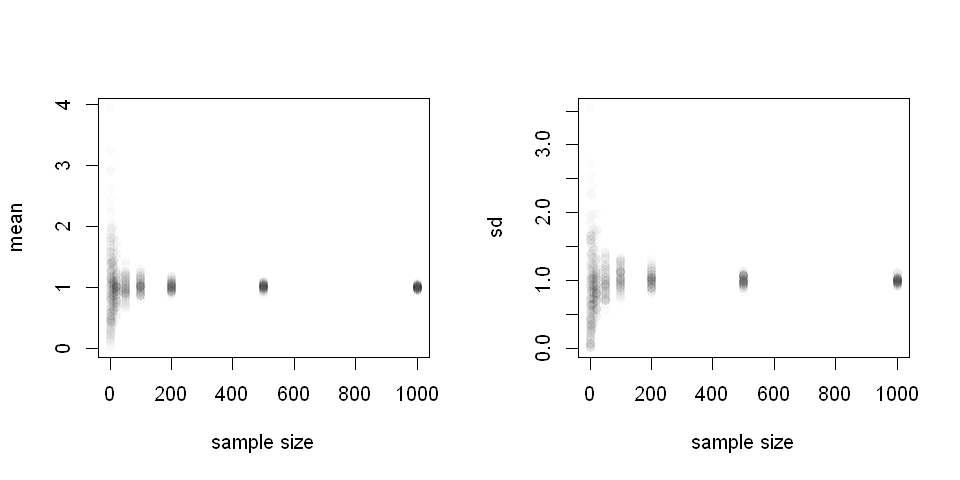

In [95]:
par(mfrow=c(1,2))
plot(df[,'n'],df[,'mean'],xlab="sample size",ylab="mean",pch=19,col=rgb(0,0,0,.01))
plot(df[,'n'],df[,'sd'],xlab="sample size",ylab="sd",pch=19,col=rgb(0,0,0,.01))

Let's now check how well each of the sample sizes fits a normal.

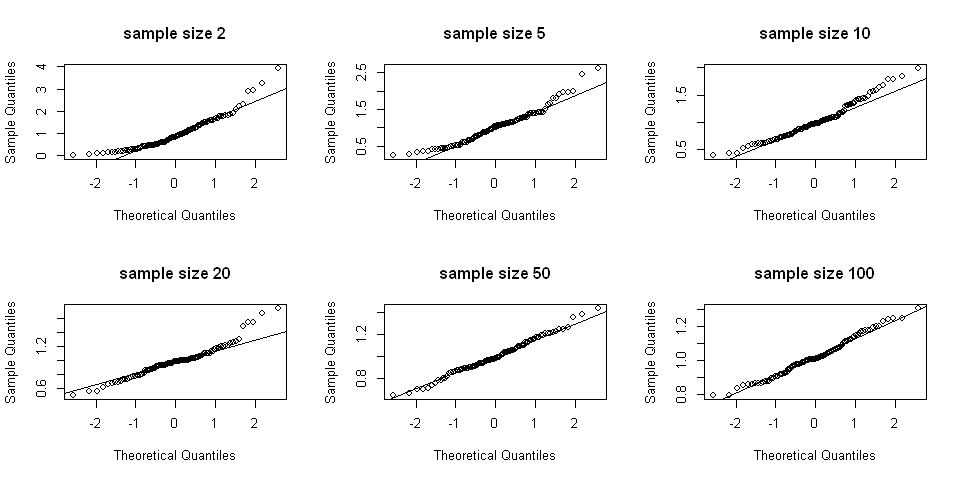

In [97]:
par(mfrow = c(2,3))
for (n in c(2,5,10,20,50,100)){
    qqnorm(df[df[,"n"]==n,"mean"],main=paste("sample size",n))
    qqline(df[df[,"n"]==n,"mean"])
}


As you can see, for low sample sizes, the distribution of means do not fit the normal distribution very well. But eventually the means of the samples do converge to a normal distribution.

In [100]:
ci_mean = matrix(,0,3)
for (n in unique(df[,"n"])){
    ci_mean = rbind(ci_mean,c(n,quantile(df[df[,"n"]==n,"mean"],c(0.025,0.975))))
}
colnames(ci_mean) = c("n","ci_low","ci_hi")

ci_var = matrix(,0,3)
for (n in unique(df[,"n"])){
    ci_var = rbind(ci_var,c(n,quantile(df[df[,"n"]==n,"sd"],c(0.025,0.975))))
}
colnames(ci_var) = c("n","ci_low","ci_hi")

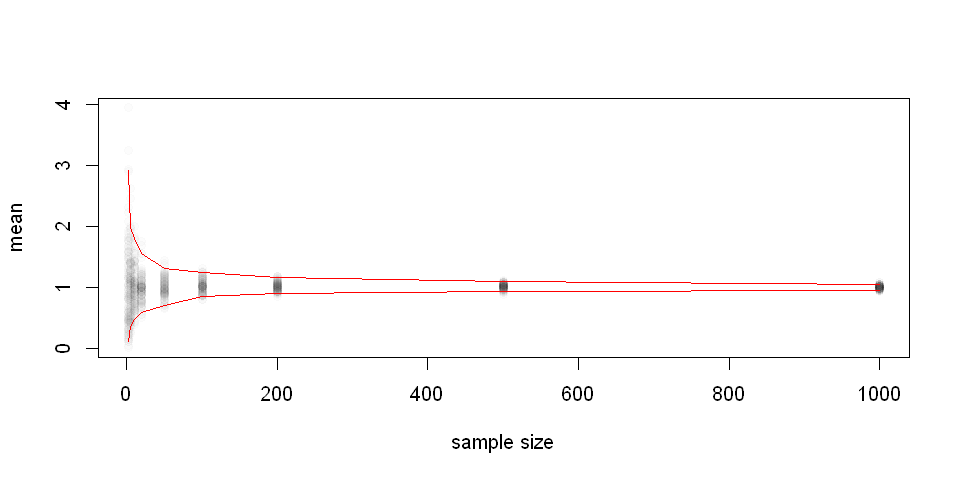

In [101]:
plot(df[,"n"],df[,"mean"],xlab="sample size",ylab="mean",pch=19,col=rgb(0,0,0,.01))
lines(ci_mean[,'n'],ci_mean[,'ci_low'],col="red")
lines(ci_mean[,'n'],ci_mean[,'ci_hi'],col="red")

# The t-distribution and confidence interval for the mean

As before, we are going to draw a set of samples of different sizes from a (normal) distribution. The *Central Limit Theorem* tells us that the distribution of the mean (for each smaple size) has a particular distribution: a normal with mean $\mu$ (the same as the distribution we are sampling from) and standard deviation $\frac{1}{n}\sigma$. Let's test that and ask how often is the *true* mean inside the 95% quantile of a normal distribution. 

Specifically, for each sample size, we calculate the mean and standard deviation and ask if the true mean is inside the interval:

$$
\left[ \hat{m}+Z_{2.5}\frac{\hat{s}}{\sqrt{n}} ; \hat{m}+Z_{97.5}\frac{\hat{s}}{\sqrt{n}}  \right]
$$

This 95% interval is often called the *95% confidence interval* (in this case of a normal) and will appear repeatedly when we talk about hypothesis testing. We expect that 95% of the times, the true mean should be inside this interval..


In [109]:
repetitions = 1000
# sample_size=10
mu = 1

q_lo = qnorm(0.025)
q_hi = qnorm(0.975)

ns = vector()
counts = vector()

for(sample_size in seq(2,100,2)){
    count = 0
    ns =c(ns,sample_size)
    for (i in 1:repetitions){
#         x = rexp(sample_size,rate=1/mu)
        x = rnorm(sample_size,mu,1)
        m = mean(x)
        s = sd(x)

        lowerbound = m+q_lo*s/sqrt(sample_size)
        upperbound = m+q_hi*s/sqrt(sample_size)

        if( (mu>=lowerbound)&&(mu<=upperbound) ){
            count = count+1
        }
    }
    count/repetitions
    counts = c(counts,count/repetitions)
}


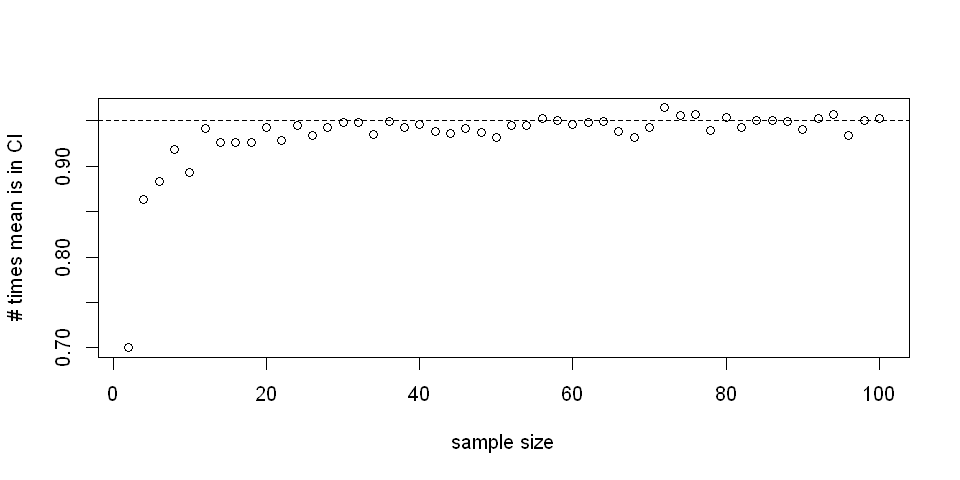

In [113]:
plot(ns,counts,ylab = "# times mean is in CI",xlab="sample size")
# lines(c(0,1000),c(0.95,0.95))
abline(h=.95,lty=2)

**What is going on here?** We are sampling from a normal distribution, so the mean should be clearly normal distributed, but the estimate of the mean seems not be inside the CI as often as we expected.

The problem is that we are estimating the variance from the sample. When we are constructing our confidence intervals, we use the estimate, instead of the true variance of the population. When the sample size is small, this leads to an underestimation of the width of the confidence interval.


Lets repeat the same experiment, now using the t-distribution, instead of the normal distribution, to construct out confidence intervals.

In [119]:
repetitions = 1000
mu = 1

q_lo = qnorm(0.025)
q_hi = qnorm(0.975)

ns = vector()
counts = vector()
countst = vector()

for(sample_size in seq(2,100,1)){
    count = 0
    countt = 0
    ns =c(ns,sample_size)
    for (i in 1:repetitions){
        x = rnorm(sample_size,mu,1)
        m = mean(x)
        s = sd(x)

        lowerbound = m+q_lo*s/sqrt(sample_size)
        upperbound = m+q_hi*s/sqrt(sample_size)

        if( (mu>=lowerbound)&&(mu<=upperbound) ){
            count = count+1
        }
        
        # for the t-distirbution
        qt_lo = qt(0.025,df=sample_size-1)
        qt_hi = qt(0.975,df=sample_size-1)
        
        lowerboundt = m+qt_lo*s/sqrt(sample_size)
        upperboundt = m+qt_hi*s/sqrt(sample_size)

        if( (mu>=lowerboundt)&&(mu<=upperboundt) ){
            countt = countt+1
        }
    }
    #count/repetitions
    counts = c(counts,count/repetitions)
    countst = c(countst,countt/repetitions)
}

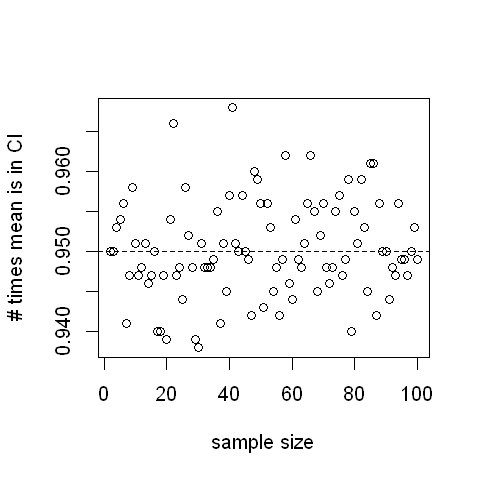

In [120]:
plot(ns,countst,ylab = "# times mean is in CI",xlab="sample size")
# lines(ns,counts)
# lines(c(0,1000),c(0.95,0.95))
abline(h=.95,lty=2)

Now, our confidence intervals include the mean 95% of the times, regardless of the sample size.

## how does the t-dist approaches a normal?

In [121]:
options(repr.plot.width=4, repr.plot.height=4)

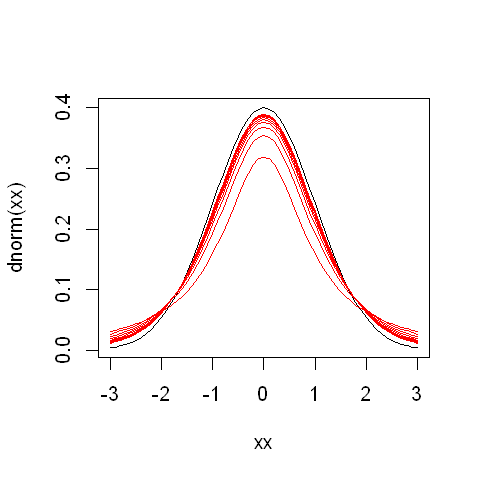

In [122]:
xx = seq(-3,3,.1)
plot(xx,dnorm(xx),type = 'l',col='black')
for (n in seq(2,10,1)){
    lines(xx,dt(xx,df=n-1),type = 'l',col='red')
}